## Análise eplóratória e descritiva

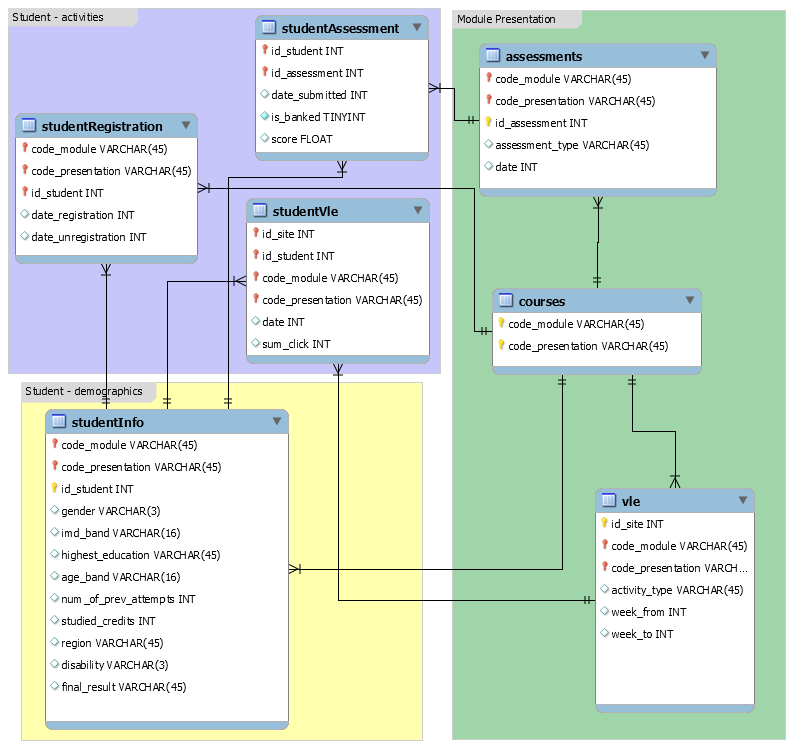

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import numpy as np

In [183]:
informacao_estudante = pd.read_csv('Dados/studentInfo.csv')
estudantes_registrados = pd.read_csv('Dados/studentRegistration.csv')
studentAssessment = pd.read_csv('Dados/studentAssessment.csv')
cursos = pd.read_csv('Dados/courses.csv')
ava = pd.read_csv('Dados/vle.csv')
assessments = pd.read_csv('Dados/assessments.csv')

In [184]:
chunks = []
for chunk in pd.read_csv('Dados/studentVle.csv',low_memory=False,chunksize=10000):
    chunks.append(chunk)
    estudante_ava_teste = pd.concat(chunks)

In [185]:
estudante_ava =estudante_ava_teste.copy()

In [186]:
estudante_ava

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [187]:
#estudante_ava = pd.read_csv('Dados/studentVle.csv', error_bad_lines=False, engine="python")
#estudante_ava

In [188]:
informacao_estudante.sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
25242,FFF,2013J,586705,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Distinction
14501,DDD,2013J,165178,F,West Midlands Region,A Level or Equivalent,40-50%,0-35,0,120,N,Withdrawn
4839,BBB,2014B,264106,F,South Region,Lower Than A Level,90-100%,35-55,0,120,N,Pass
2114,BBB,2013B,554482,F,South Region,Lower Than A Level,90-100%,35-55,0,60,N,Withdrawn
32277,GGG,2014J,674467,M,West Midlands Region,A Level or Equivalent,40-50%,0-35,0,30,Y,Withdrawn


In [189]:
qtd_linhas= informacao_estudante.shape[0]

In [190]:
print('no informacao_estudante a quantidade de linhas  é {}   e a quantidade de colunas é {}: '.format(informacao_estudante.shape[0],informacao_estudante.shape[1]))

no informacao_estudante a quantidade de linhas  é 32593   e a quantidade de colunas é 12: 


Traduzir colunas

In [191]:
colunas_traducao = {
'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao'  ,     
'id_student' : 'id_estudante'   ,
'gender' : 'sexo'          ,
'region' : 'regiao'         ,      
'highest_education' : 'nivel_educacao',    
'imd_band' : 'ind_privacao_multipla'   ,
'age_band' : 'faixa_etaria'            ,
'num_of_prev_attempts' : 'qtd_inscricao_modulo',
'studied_credits' : 'nu_credito'  ,
'disability' : 'deficiencia'      ,
'final_result' : 'resultado_final'
}

In [192]:
informacao_estudante = informacao_estudante.rename(columns = colunas_traducao)

In [193]:
informacao_estudante.head(3)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


DataTypes

In [194]:
print('DataTypes do conjunto de dados : \n \n ', informacao_estudante.dtypes)

DataTypes do conjunto de dados : 
 
  cod_modulo               object
cod_apresentacao         object
id_estudante              int64
sexo                     object
regiao                   object
nivel_educacao           object
ind_privacao_multipla    object
faixa_etaria             object
qtd_inscricao_modulo      int64
nu_credito                int64
deficiencia              object
resultado_final          object
dtype: object


In [195]:
# Sem dados nulos
informacao_estudante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
cod_modulo               32593 non-null object
cod_apresentacao         32593 non-null object
id_estudante             32593 non-null int64
sexo                     32593 non-null object
regiao                   32593 non-null object
nivel_educacao           32593 non-null object
ind_privacao_multipla    31482 non-null object
faixa_etaria             32593 non-null object
qtd_inscricao_modulo     32593 non-null int64
nu_credito               32593 non-null int64
deficiencia              32593 non-null object
resultado_final          32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [196]:
qtd_estudantes = len(informacao_estudante['id_estudante'].unique())

In [197]:
informacao_estudante_sem_duplicado = informacao_estudante.drop_duplicates(subset='id_estudante', keep='first')
informacao_estudante_sem_duplicado

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [198]:
qtd_sexo = informacao_estudante_sem_duplicado['sexo'].value_counts()
qtd_sexo

M    15046
F    13739
Name: sexo, dtype: int64

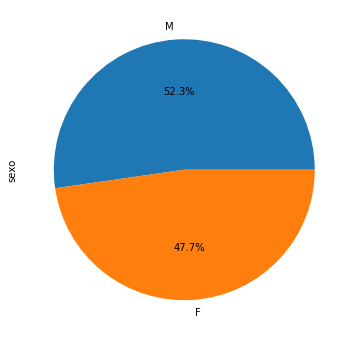

In [199]:
qtd_sexo.plot(kind='pie', autopct='%1.1f%%', figsize= (6,6)) #autopct prevê que o gráfico possa mostrar percentil.

Quantidade do público feminino é 4.6 % menor que estudantes masculinos.

Não há  discrepância grande entre estudantes masculinos e femininos, sendo ambos estudantes em potencial

Criando nova coluna para nível educacional

In [200]:
informacao_estudante['id_sexo'] = 0
# estudantes unicos
informacao_estudante_sem_duplicado['id_sexo'] = 0

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
informacao_estudante.loc[informacao_estudante.sexo == 'F','id_sexo']=1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.sexo == 'F','id_sexo']=1
informacao_estudante_sem_duplicado.head(3)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1


Criando peso para cada nível educacional


In [202]:
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'No Formal quals','id_nivel_educacao']= 0
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'Lower Than A Level','id_nivel_educacao']= 1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'A Level or Equivalent','id_nivel_educacao']= 2
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'HE Qualification','id_nivel_educacao']= 3
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.nivel_educacao == 'Post Graduate Qualification','id_nivel_educacao']= 4

informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.deficiencia == 'Y','id_deficiencia']= 1
informacao_estudante_sem_duplicado.loc[informacao_estudante_sem_duplicado.deficiencia == 'N','id_deficiencia']= 0

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [203]:
informacao_estudante_sem_duplicado.head(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,3.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2.0,1.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1,2.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1,1.0,0.0


In [204]:
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'No Formal quals','id_nivel_educacao']= 0
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'Lower Than A Level','id_nivel_educacao']= 1
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'A Level or Equivalent','id_nivel_educacao']= 2
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'HE Qualification','id_nivel_educacao']= 3
informacao_estudante.loc[informacao_estudante.nivel_educacao == 'Post Graduate Qualification','id_nivel_educacao']= 4

informacao_estudante.loc[informacao_estudante.deficiencia == 'Y','id_deficiencia']= 1
informacao_estudante.loc[informacao_estudante.deficiencia == 'N','id_deficiencia']= 0

Convertendo datatype

In [205]:
informacao_estudante.id_nivel_educacao = informacao_estudante.id_nivel_educacao.astype(int)
informacao_estudante.id_deficiencia = informacao_estudante.id_deficiencia.astype(int)
informacao_estudante_sem_duplicado.idnivel_educacao = informacao_estudante_sem_duplicado.id_nivel_educacao.astype(int)
informacao_estudante_sem_duplicado.id_deficiencia = informacao_estudante_sem_duplicado.id_deficiencia.astype(int)
informacao_estudante_sem_duplicado.tail(3)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1,2.0,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,1,1.0,0
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,1,3.0,0


In [206]:
informacao_estudante.nivel_educacao.unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

Média do nível educacional por sexo

In [207]:
media_educacao = informacao_estudante_sem_duplicado[['id_nivel_educacao', 'sexo']].groupby(['sexo'], as_index=False).mean()
media_educacao

,sexo,id_nivel_educacao
0,F,1.676614
1,M,1.777150


In [208]:
group_sexo_educacao = informacao_estudante_sem_duplicado[['nivel_educacao', 'sexo', 'id_sexo']].groupby(['nivel_educacao', 'sexo']).count()
group_sexo_educacao_final = pd.DataFrame(group_sexo_educacao).reset_index().rename(columns={'id_sexo': 'qtd_sexo'})
group_sexo_educacao_final

,nivel_educacao,sexo,qtd_sexo
0,A Level or Equivalent,F,5935
1,A Level or Equivalent,M,6420
2,HE Qualification,F,1658
3,HE Qualification,M,2434
4,Lower Than A Level,F,5875
5,Lower Than A Level,M,5905
6,No Formal quals,F,192
7,No Formal quals,M,114
8,Post Graduate Qualification,F,79
9,Post Graduate Qualification,M,173


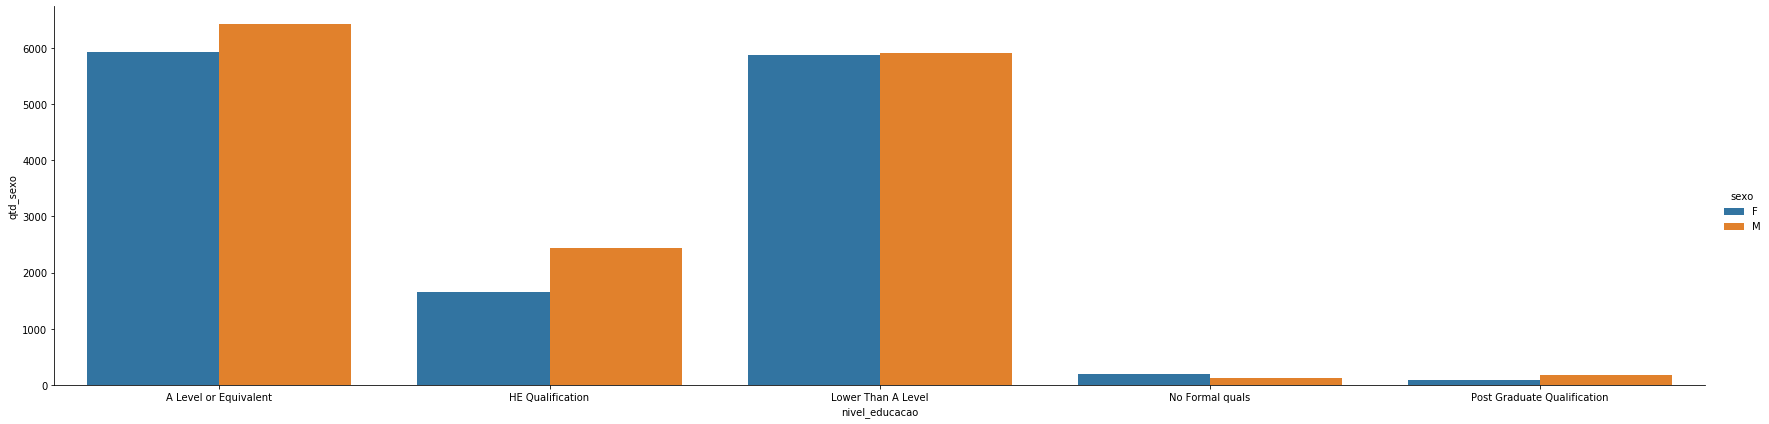

In [209]:
g = sns.catplot(x="nivel_educacao", y="qtd_sexo",

                hue="sexo", 

                data=group_sexo_educacao_final, kind="bar",

                height=6, aspect=4);

Sexo não é um denominador para nível educacional

In [210]:
print('DataTypes do conjunto de dados : \n \n ', informacao_estudante_sem_duplicado.dtypes)

DataTypes do conjunto de dados : 
 
  cod_modulo                object
cod_apresentacao          object
id_estudante               int64
sexo                      object
regiao                    object
nivel_educacao            object
ind_privacao_multipla     object
faixa_etaria              object
qtd_inscricao_modulo       int64
nu_credito                 int64
deficiencia               object
resultado_final           object
id_sexo                    int64
id_nivel_educacao        float64
id_deficiencia             int32
dtype: object


Alunos com algum tipo de deficiencia

In [211]:
selecao = informacao_estudante_sem_duplicado.deficiencia == 'Y'
localizar_selecao =  informacao_estudante_sem_duplicado[selecao]
localizar_selecao

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2.0,1
45,AAA,2013J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,1,1.0,1
52,AAA,2013J,146188,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,Y,Fail,1,2.0,1
55,AAA,2013J,148993,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2.0,1
86,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32567,GGG,2014J,2053521,F,South West Region,A Level or Equivalent,20-30%,35-55,1,30,Y,Pass,1,2.0,1
32576,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn,1,2.0,1
32581,GGG,2014J,2456431,F,South Region,Lower Than A Level,70-80%,0-35,0,30,Y,Fail,1,1.0,1
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,1,2.0,1


In [212]:
print('Quantidade de estudantes PCD {} '.format(informacao_estudante_sem_duplicado.id_deficiencia.value_counts()[1]))

Quantidade de estudantes PCD 2717 


In [213]:
pcd_porcentagem = (informacao_estudante_sem_duplicado.id_deficiencia.value_counts()[1] /len(informacao_estudante_sem_duplicado))*100
pcd_porcentagem

9.438943894389439

Análise resultado final

In [214]:
informacao_estudante.resultado_final.unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

## Um módulo pode ter mais de um cod_apresentação. Verificaremos o resultado considerando que o aluno pode reprovar em uma apresentação

In [215]:
qtd_resultado = pd.DataFrame(informacao_estudante['resultado_final'].value_counts())
qtd_resultado

,resultado_final
Pass,12361
Withdrawn,10156
Fail,7052
Distinction,3024


In [216]:
qtd_resultado = qtd_resultado.reset_index().rename(columns={'index':'Resultado', 'resultado_final':'qtd_resultado'})
qtd_resultado

,Resultado,qtd_resultado
0,Pass,12361
1,Withdrawn,10156
2,Fail,7052
3,Distinction,3024


Percentual do Resultado final

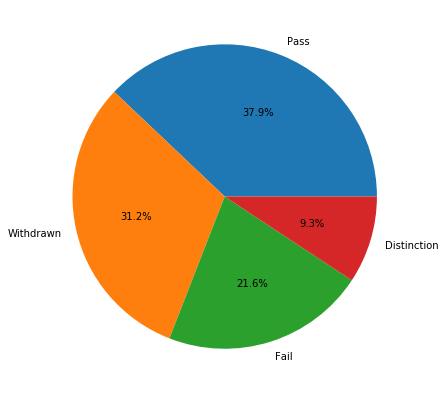

In [217]:
fig = plt.figure(figsize=(10,7))
plt.pie(qtd_resultado['qtd_resultado'], labels=qtd_resultado['Resultado'], autopct='%1.1f%%')
plt.show()

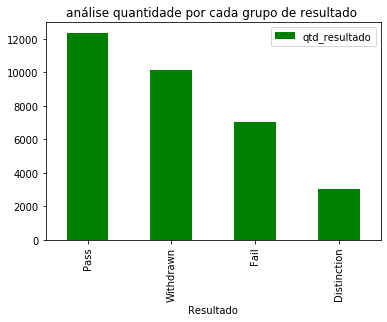

In [218]:
qtd_resultado.plot(x= 'Resultado',kind='bar', title='análise quantidade por cada grupo de resultado ', color='green')

não tem discrepância entre a Quantidade de alunos aprovados é alunos suspensos

número alto de reprovados 

Dataset - estudantes_registrados

In [219]:
estudantes_registrados.tail(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [220]:
print('Datatypes do dataset studentRegistration   ')
estudantes_registrados.dtypes

Datatypes do dataset studentRegistration   


code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [221]:
# dt_cancelameto tem dados nulos
estudantes_registrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [222]:
#tratar nulos
estudantes_registrados = estudantes_registrados.fillna(0)
estudantes_registrados

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,0.0
1,AAA,2013J,28400,-53.0,0.0
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,0.0
4,AAA,2013J,32885,-176.0,0.0
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0.0
32589,GGG,2014J,2645731,-23.0,0.0
32590,GGG,2014J,2648187,-129.0,0.0
32591,GGG,2014J,2679821,-49.0,101.0


In [223]:
estudantes_registrados_traduçao = {'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao'  ,     
'id_student' : 'id_estudante'   ,
'date_registration' : 'dt_registro',
'date_unregistration' : 'dt_cancelamento'
}

In [224]:
estudantes_registrados = estudantes_registrados.rename(columns = estudantes_registrados_traduçao)

In [225]:
informacao_estudante_registro_merge = pd.merge(informacao_estudante,estudantes_registrados , how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'] )
informacao_estudante_registro_merge.head(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia,dt_registro,dt_cancelamento
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,3,0,-159.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3,0,-53.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2,1,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1,2,0,-52.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1,1,0,-176.0,0.0


In [226]:
estudantes_registrados.dtypes

cod_modulo           object
cod_apresentacao     object
id_estudante          int64
dt_registro         float64
dt_cancelamento     float64
dtype: object

In [227]:
cursos = cursos.rename(columns={'code_module' : 'cod_modulo',
'code_presentation' : 'cod_apresentacao',
'module_presentation_length': 'tamanho_apresentacao_modulo'})

In [228]:
cursos.head(3)

,cod_modulo,cod_apresentacao,tamanho_apresentacao_modulo
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268


In [229]:
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
cod_modulo                     22 non-null object
cod_apresentacao               22 non-null object
tamanho_apresentacao_modulo    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [230]:
print('DataType do courses ')
cursos.dtypes

DataType do courses 


cod_modulo                     object
cod_apresentacao               object
tamanho_apresentacao_modulo     int64
dtype: object

Ao realizar merge conseguimos fazer join entre os dataframes , assim enriquecemos nosssa análise

In [231]:
informacao_estudante_registro_curso_merge = pd.merge(informacao_estudante_registro_merge, cursos, how='left', on=['cod_modulo', 'cod_apresentacao'] )

In [232]:
informacao_estudante_registro_curso_merge.head(2)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia,dt_registro,dt_cancelamento,tamanho_apresentacao_modulo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,3,0,-159.0,0.0,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3,0,-53.0,0.0,268


In [233]:
informacao_estudante_registro_curso_merge.shape

(32593, 18)

In [234]:
informacao_estudante_registro_curso_merge.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [235]:
informacao_estudante_registro_curso_merge.cod_modulo.value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: cod_modulo, dtype: int64

In [236]:
selecao = informacao_estudante_registro_curso_merge['dt_cancelamento'] != 0
buscar = informacao_estudante_registro_curso_merge[selecao]
qtd_cancelados_modulo = pd.DataFrame(buscar.cod_modulo.value_counts())
qtd_cancelados_modulo

,cod_modulo
FFF,2261
BBB,2246
DDD,2155
CCC,1911
EEE,668
GGG,286
AAA,126


In [237]:
buscar

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia,dt_registro,dt_cancelamento,tamanho_apresentacao_modulo
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2,1,-92.0,12.0,268
15,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,1,2,0,-180.0,96.0,268
22,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,0,1,0,-170.0,72.0,268
29,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,0,3,0,5.0,175.0,268
41,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,0,2,0,-197.0,135.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn,1,2,1,-23.0,58.0,269
32577,GGG,2014J,2342238,M,Ireland,HE Qualification,80-90%,0-35,0,30,N,Withdrawn,0,3,0,-45.0,74.0,269
32578,GGG,2014J,2357806,F,Ireland,Lower Than A Level,40-50%,35-55,0,30,N,Withdrawn,1,1,0,-128.0,73.0,269
32586,GGG,2014J,2608143,M,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn,0,3,0,-45.0,48.0,269


In [238]:
qtd_cancelados_modulo = qtd_cancelados_modulo.rename(columns={'cod_modulo' : 'dt_cancelamento'})
qtd_cancelados_modulo = qtd_cancelados_modulo.rename_axis('Modulo')
qtd_cancelados_modulo

,dt_cancelamento
Modulo,
FFF,2261
BBB,2246
DDD,2155
CCC,1911
EEE,668
GGG,286
AAA,126


In [239]:
qtd_cancelados_modulo.reset_index(level=0, inplace=True) 
#sns.catplot(y='Modulo', x = 'qtd_cancelados', data=qtd_cancelados_modulo)

In [240]:
qtd_cancelados_modulo.dt_cancelamento.sum()

9653

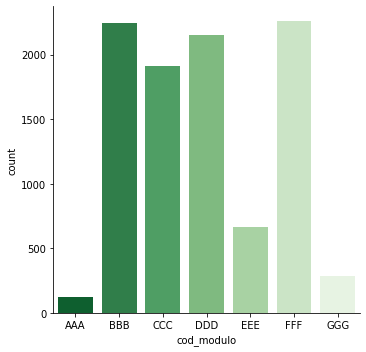

In [241]:
ax = sns.catplot(x="cod_modulo", kind="count", palette="Greens_r",data=buscar)

Porcentagem de cancelamentos sobre total de estudantes por modulo/apresentação

In [242]:
AAA_porcentagem =  (qtd_cancelados_modulo.dt_cancelamento[6] /qtd_linhas)*100
BBB_porcentagem  = (qtd_cancelados_modulo.dt_cancelamento[1] /qtd_linhas)*100
CCC_porcentagem = (qtd_cancelados_modulo.dt_cancelamento[3] /qtd_linhas)*100
DDD_porcentagem = (qtd_cancelados_modulo.dt_cancelamento[2] /qtd_linhas)*100
EEE_porcentagem = (qtd_cancelados_modulo.dt_cancelamento[4] /qtd_linhas)*100
FFF_porcentagem = (qtd_cancelados_modulo.dt_cancelamento[0] /qtd_linhas)*100
GGG_porcentagem  = (qtd_cancelados_modulo.dt_cancelamento[5] /qtd_linhas)*100

In [243]:
modulo=['AAA','BBB','CCC','DDD','EEE','FFF','GGG']
porcentagem_cancelados = ([AAA_porcentagem, BBB_porcentagem, CCC_porcentagem,
      DDD_porcentagem, EEE_porcentagem, FFF_porcentagem, GGG_porcentagem])
porcentagem_cancelados = pd.DataFrame(porcentagem_cancelados, columns=['porcentagem_cancelados'], index=modulo).round(2)
porcentagem_cancelados = porcentagem_cancelados.reset_index().rename(columns={'index':'modulo'})
porcentagem_cancelados

,modulo,porcentagem_cancelados
0,AAA,0.39
1,BBB,6.89
2,CCC,5.86
3,DDD,6.61
4,EEE,2.05
5,FFF,6.94
6,GGG,0.88


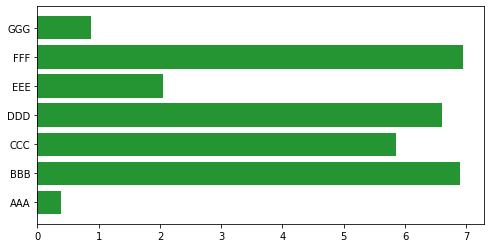

In [244]:
plt.figure(figsize=(8,4))
plt.barh(porcentagem_cancelados.modulo, porcentagem_cancelados.porcentagem_cancelados, color='#259534')
plt.show()

Porcentagem sobre total de cancelados

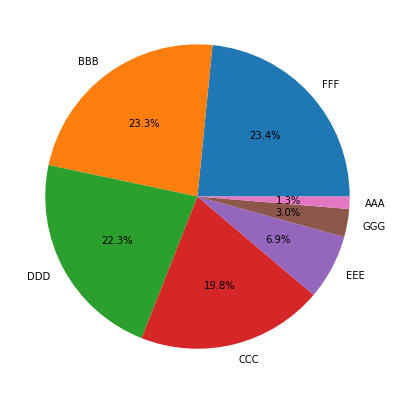

In [245]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(qtd_cancelados_modulo['dt_cancelamento'], labels = qtd_cancelados_modulo['Modulo'],autopct='%1.1f%%') 
plt.show()

In [246]:
informacao_estudante_registro_curso_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 18 columns):
cod_modulo                     32593 non-null object
cod_apresentacao               32593 non-null object
id_estudante                   32593 non-null int64
sexo                           32593 non-null object
regiao                         32593 non-null object
nivel_educacao                 32593 non-null object
ind_privacao_multipla          31482 non-null object
faixa_etaria                   32593 non-null object
qtd_inscricao_modulo           32593 non-null int64
nu_credito                     32593 non-null int64
deficiencia                    32593 non-null object
resultado_final                32593 non-null object
id_sexo                        32593 non-null int64
id_nivel_educacao              32593 non-null int32
id_deficiencia                 32593 non-null int32
dt_registro                    32593 non-null float64
dt_cancelamento                32593 non-null fl

In [247]:
# tamanho do modulo por resultado informacao_estudante_registro_curso_merge
df_tamanho_modulo_result = pd.DataFrame(informacao_estudante_registro_curso_merge[['resultado_final', 'tamanho_apresentacao_modulo', 'nu_credito']].groupby(['tamanho_apresentacao_modulo','resultado_final','nu_credito']).size()).reset_index().rename(columns={0:'qtd_resultado'})
df_tamanho_modulo_result = df_tamanho_modulo_result.sort_values(by='qtd_resultado', ascending=False)
df_tamanho_modulo_result.index = range(len(df_tamanho_modulo_result))
df_tamanho_modulo_result

,tamanho_apresentacao_modulo,resultado_final,nu_credito,qtd_resultado
0,268,Pass,60,1583
1,269,Pass,60,1259
2,262,Pass,60,1214
3,240,Pass,60,1110
4,241,Withdrawn,60,968
...,...,...,...,...
498,262,Pass,190,1
499,262,Pass,210,1
500,262,Pass,300,1
501,234,Withdrawn,270,1


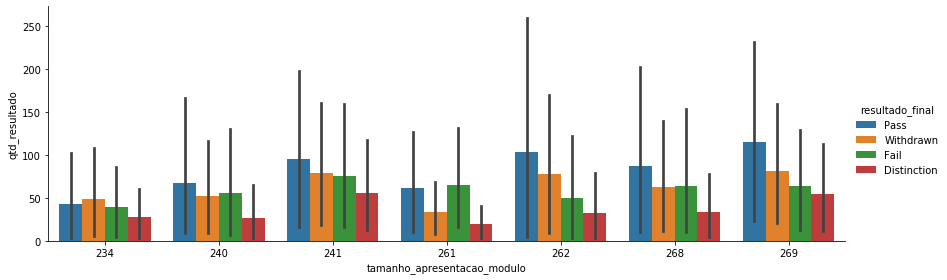

In [248]:
g0 = sns.catplot(x="tamanho_apresentacao_modulo", y="qtd_resultado",

                hue="resultado_final", 

                data=df_tamanho_modulo_result, kind="bar",

                height=4, aspect=3);

Tamanho do módulo não influencia no resultado final

In [249]:
informacao_estudante_registro_curso_merge.head(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia,dt_registro,dt_cancelamento,tamanho_apresentacao_modulo
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,3,0,-159.0,0.0,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3,0,-53.0,0.0,268
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2,1,-92.0,12.0,268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1,2,0,-52.0,0.0,268
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1,1,0,-176.0,0.0,268


Modulo *BBB* e *FFF* possuem maior taxa de cancelamentos

In [250]:
informacao_estudante.head(3)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,3,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2,1


In [251]:
informacao_estudante.groupby(['cod_modulo']).get_group("BBB")

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
748,BBB,2013B,23629,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,1,1,0
749,BBB,2013B,25107,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,120,N,Pass,1,1,0
750,BBB,2013B,27891,M,Scotland,Lower Than A Level,0-10%,0-35,2,120,Y,Withdrawn,0,1,1
751,BBB,2013B,29144,M,South Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,0,1,0
752,BBB,2013B,31663,M,North Region,A Level or Equivalent,30-40%,35-55,0,60,N,Pass,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,BBB,2014J,2692969,F,Scotland,HE Qualification,80-90%,35-55,0,75,N,Pass,1,3,0
8653,BBB,2014J,2694919,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,120,Y,Pass,1,1,1
8654,BBB,2014J,2698577,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,1,1,0
8655,BBB,2014J,2698588,F,Yorkshire Region,HE Qualification,30-40%,0-35,0,120,N,Distinction,1,3,0


In [252]:
informacao_estudante.cod_modulo.count()

32593

Análise estudante - AVA

In [253]:
ava.head(3)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN


In [254]:
traducao_ava = {'code_module': 'cod_modulo',
'code_presentation':'cod_apresentacao',
'activity_type':'tipo_atividade',
'week_from': 'semana_inicial_material',
'week_to' :'semana_final_material'
}

In [255]:
ava.rename(columns=traducao_ava, inplace=True)
ava.head(5)

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [256]:
print('Datatype vle')
ava.dtypes

Datatype vle


id_site                      int64
cod_modulo                  object
cod_apresentacao            object
tipo_atividade              object
semana_inicial_material    float64
semana_final_material      float64
dtype: object

In [257]:
# temos dados nulos 
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site                    6364 non-null int64
cod_modulo                 6364 non-null object
cod_apresentacao           6364 non-null object
tipo_atividade             6364 non-null object
semana_inicial_material    1121 non-null float64
semana_final_material      1121 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [258]:
print('Quantidade de linhas {} e colunas {} no dataframe AVA'.format(ava.shape[0], ava.shape[1]))

Quantidade de linhas 6364 e colunas 6 no dataframe AVA


In [259]:
selecao = ava['semana_inicial_material'].notna()
buscar = ava[selecao]
buscar.head(3)

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0


In [260]:
selecao = ava['semana_inicial_material'] == 0
buscar = ava[selecao]
buscar

,id_site,cod_modulo,cod_apresentacao,tipo_atividade,semana_inicial_material,semana_final_material
3270,773452,DDD,2014B,url,0.0,0.0
3647,813933,DDD,2014J,oucontent,0.0,0.0


Começa a contar a primeira semana como 0. Por isso não tera tratamento de nulo
inserindo 0 nos dados faltantes

In [261]:
ava.tipo_atividade.value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: tipo_atividade, dtype: int64

In [262]:
atividade_por_site = ava[['id_site','tipo_atividade']].groupby(['tipo_atividade']).count()
atividade_por_site

,id_site
tipo_atividade,
dataplus,28
dualpane,20
externalquiz,26
folder,2
forumng,194
glossary,21
homepage,22
htmlactivity,4
oucollaborate,82


In [263]:
ava.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [264]:
estudante_ava_traducao = {
'code_module': 'cod_modulo',
'code_presentation': 'cod_apresentacao',
'id_student':'id_estudante',
'id_site': 'id_site',
'date': 'data_interacao_aluno',
'sum_click' : 'qtd_click'
}

In [265]:
estudante_ava = estudante_ava.rename(columns=estudante_ava_traducao)
estudante_ava.head(5)

,cod_modulo,cod_apresentacao,id_estudante,id_site,data_interacao_aluno,qtd_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


qual material tem maior interacao

In [266]:
len(estudante_ava.id_site.unique())

6268

In [267]:
estudante_ava[['id_site', 'qtd_click']].groupby(['id_site']).max()

,qtd_click
id_site,
526721,4098
526735,20
526737,110
526738,82
526739,46
...,...
1042376,10
1046237,7
1046812,170


In [268]:
informacao_estudante_sem_duplicado[[ 'id_estudante', 'cod_modulo', 'cod_apresentacao']].groupby(['cod_modulo', 'cod_apresentacao']).count().rename(columns={'id_estudante': 'qtd_estudante'})

qtd_estudante
cod_modulo cod_apresentacao               
AAA        2013J                       383
           2014J                       329
BBB        2013B                      1767
           2013J                      2193
           2014B                      1521
           2014J                      2211
CCC        2014B                      1936
           2014J                      2313
DDD        2013B                      1185
           2013J                      1573
           2014B                       934
           2014J                      1434
EEE        2013J                       656
           2014B                       266
           2014J                       839
FFF        2013B                      1562
           2013J                      2024
           2014B                      1201
           2014J                      1990
GGG        2013J                       907
           2014B                       818
           2014J                       743

In [269]:
estudante_ava.cod_modulo.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [270]:
estudante_ava_merge = pd.merge(estudante_ava,ava, how='left', on=['id_site', 'cod_modulo', 'cod_apresentacao'] )

In [271]:
estudante_ava_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 10655279
Data columns (total 9 columns):
cod_modulo                 object
cod_apresentacao           object
id_estudante               int64
id_site                    int64
data_interacao_aluno       int64
qtd_click                  int64
tipo_atividade             object
semana_inicial_material    float64
semana_final_material      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 812.9+ MB


In [272]:
estudante_ava_merge.sample(5)

,cod_modulo,cod_apresentacao,id_estudante,id_site,data_interacao_aluno,qtd_click,tipo_atividade,semana_inicial_material,semana_final_material
2180506,CCC,2014B,585393,729678,94,5,forumng,NaN,NaN
5181434,DDD,2014J,584981,813962,194,1,subpage,NaN,NaN
2317489,CCC,2014B,631044,729674,183,2,forumng,NaN,NaN
1502907,BBB,2014J,698471,913477,-2,3,oucontent,2.0,2.0
3117394,CCC,2014J,611255,909018,247,1,forumng,NaN,NaN


In [273]:
merge_estudante_ava = pd.merge( informacao_estudante,estudante_ava_merge, how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'])
merge_estudante_ava.sample(5)

,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,...,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia,id_site,data_interacao_aluno,qtd_click,tipo_atividade,semana_inicial_material,semana_final_material
2342668,CCC,2014B,635416,F,Scotland,Lower Than A Level,40-50%,0-35,0,30,...,Pass,1,1,0,729678.0,112.0,1.0,forumng,NaN,NaN
3503704,DDD,2013B,552999,F,North Western Region,Lower Than A Level,30-40%,0-35,0,60,...,Withdrawn,1,1,0,547303.0,60.0,2.0,homepage,NaN,NaN
3661071,DDD,2013B,2678338,F,East Anglian Region,No Formal quals,70-80%,0-35,1,120,...,Fail,1,0,0,547674.0,2.0,1.0,resource,NaN,NaN
6465382,FFF,2013B,416725,M,South Region,A Level or Equivalent,30-40%,0-35,1,60,...,Distinction,0,2,0,527180.0,88.0,4.0,subpage,NaN,NaN
6202433,EEE,2014J,694218,M,East Midlands Region,A Level or Equivalent,40-50%,0-35,0,90,...,Pass,0,2,0,832567.0,134.0,1.0,forumng,NaN,NaN


Análise dos aprovados e reprovados

In [274]:
selecao = (merge_estudante_ava.resultado_final == 'Pass') | (merge_estudante_ava.resultado_final == 'Fail')
buscar_pass_fail = merge_estudante_ava[selecao][['cod_modulo','cod_apresentacao','id_estudante','regiao','resultado_final','nivel_educacao','id_nivel_educacao','nu_credito',
                                     'id_site','qtd_click', 'data_interacao_aluno']]
buscar_pass_fail['id_resultado'] = 0
buscar_pass_fail.loc[buscar_pass_fail.resultado_final == 'Pass','id_resultado']= '1'
buscar_pass_fail.id_resultado = buscar_pass_fail.id_resultado.astype(int)
buscar_pass_fail.head(5)

,cod_modulo,cod_apresentacao,id_estudante,regiao,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno,id_resultado
0,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546669.0,16.0,-5.0,1
1,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546662.0,44.0,-5.0,1
2,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,1
3,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546668.0,2.0,-5.0,1
4,AAA,2013J,11391,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,1


In [275]:
buscar_pass_fail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7634691 entries, 0 to 10658402
Data columns (total 12 columns):
cod_modulo              object
cod_apresentacao        object
id_estudante            int64
regiao                  object
resultado_final         object
nivel_educacao          object
id_nivel_educacao       int32
nu_credito              int64
id_site                 float64
qtd_click               float64
data_interacao_aluno    float64
id_resultado            int32
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 699.0+ MB


In [276]:
#media_aprovado_reprovado = buscar[['id_estudante','qtd_click']].groupby(['id_estudante']).count()[['id_estudante','qtd_click','resultado_final']]
media_aprovado_reprovado = buscar_pass_fail.groupby(['id_estudante','resultado_final']).agg({'qtd_click':np.sum}).reset_index()
#media_aprovado_reprovado = media_aprovado_reprovado.reset_index().rename(columns={'qtd_click':'media_click'})
media_aprovado_reprovado

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
2,23629,Fail,161.0
3,23698,Pass,910.0
4,24186,Pass,184.0
...,...,...,...
18686,2698257,Pass,758.0
18687,2698535,Pass,3455.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


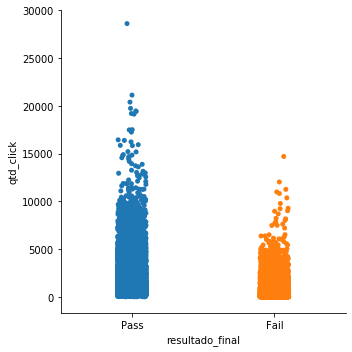

In [277]:
sns.catplot(x= 'resultado_final', y= 'qtd_click', data=media_aprovado_reprovado)

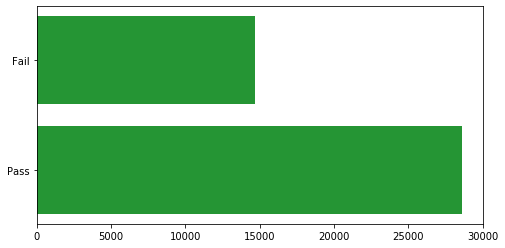

In [278]:
plt.figure(figsize=(8,4))
plt.barh(media_aprovado_reprovado.resultado_final, media_aprovado_reprovado.qtd_click, color='#259534')
plt.show()

Quanto maior a quantidade de click maior foram as aprovações 

In [279]:
selecao = buscar_pass_fail.id_estudante == 6516
teste = buscar_pass_fail[selecao]
teste['qtd_click'].count()

662

In [280]:
pd.DataFrame(informacao_estudante_sem_duplicado[['nivel_educacao', 'id_estudante']].groupby(['nivel_educacao']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})

,nivel_educacao,qtd_estudante
0,A Level or Equivalent,12355
1,HE Qualification,4092
2,Lower Than A Level,11780
3,No Formal quals,306
4,Post Graduate Qualification,252


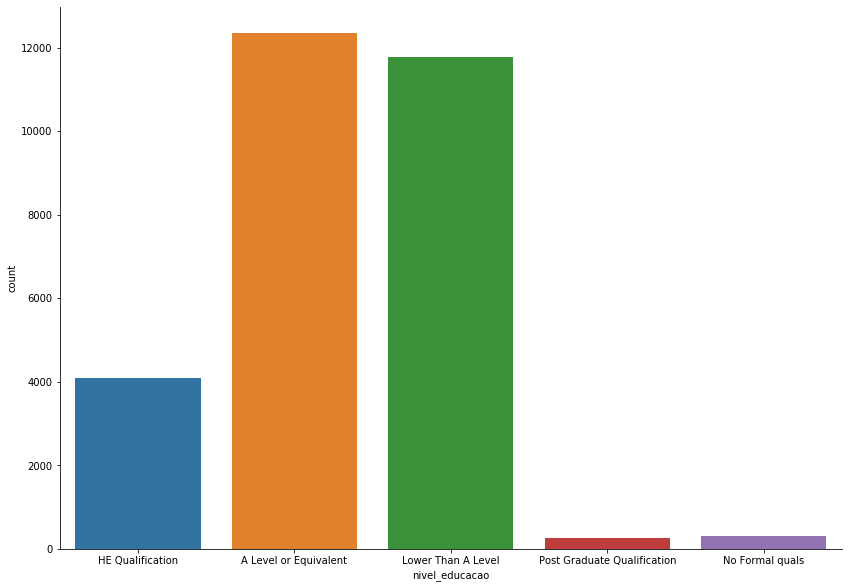

In [281]:
sns.catplot(x= 'nivel_educacao', kind='count', data=informacao_estudante_sem_duplicado, height=8.27, aspect=11.7/8.27)

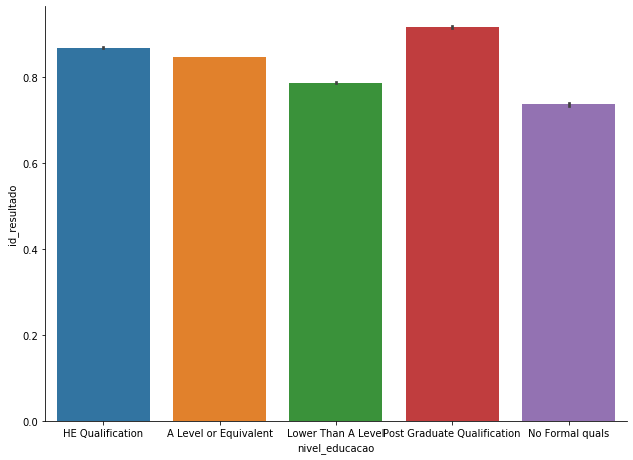

In [282]:
sns.catplot(x = 'nivel_educacao', y = 'id_resultado', data=buscar_pass_fail, kind = 'bar',height=6.50, aspect=12.7/9.27)

In [283]:
merge_estudante_ava_analise = merge_estudante_ava[['cod_modulo','cod_apresentacao','id_estudante','faixa_etaria','regiao','resultado_final','nivel_educacao','id_nivel_educacao','nu_credito',
                                     'id_site','qtd_click', 'data_interacao_aluno','regiao']]
merge_estudante_ava_analise.head(5)

,cod_modulo,cod_apresentacao,id_estudante,faixa_etaria,regiao,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno,regiao
0,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546669.0,16.0,-5.0,East Anglian Region
1,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546662.0,44.0,-5.0,East Anglian Region
2,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,East Anglian Region
3,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546668.0,2.0,-5.0,East Anglian Region
4,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,East Anglian Region


In [284]:
merge_estudante_ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10658645 entries, 0 to 10658644
Data columns (total 21 columns):
cod_modulo                 object
cod_apresentacao           object
id_estudante               int64
sexo                       object
regiao                     object
nivel_educacao             object
ind_privacao_multipla      object
faixa_etaria               object
qtd_inscricao_modulo       int64
nu_credito                 int64
deficiencia                object
resultado_final            object
id_sexo                    int64
id_nivel_educacao          int32
id_deficiencia             int32
id_site                    float64
data_interacao_aluno       float64
qtd_click                  float64
tipo_atividade             object
semana_inicial_material    float64
semana_final_material      float64
dtypes: float64(5), int32(2), int64(4), object(10)
memory usage: 1.7+ GB


In [285]:
print(merge_estudante_ava_analise['regiao'].apply(pd.Series.value_counts))

                       regiao   regiao
Scotland              1262268  1262268
South Region          1085625  1085625
East Anglian Region   1069423  1069423
London Region          982531   982531
North Western Region   880194   880194
South West Region      791951   791951
West Midlands Region   755657   755657
North Region           724265   724265
East Midlands Region   718289   718289
South East Region      703560   703560
Wales                  614371   614371
Yorkshire Region       606938   606938
Ireland                463573   463573


In [286]:

qtd_estudante_regiao = pd.DataFrame(informacao_estudante_sem_duplicado[['id_estudante', 'regiao']].groupby(['regiao']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})
qtd_estudante_regiao = qtd_estudante_regiao.sort_values(by='qtd_estudante', ascending=False)
qtd_estudante_regiao.index = range(13)
qtd_estudante_regiao


,regiao,qtd_estudante
0,East Anglian Region,3000
1,Scotland,2934
2,London Region,2845
3,South Region,2737
4,North Western Region,2548
5,West Midlands Region,2269
6,South West Region,2154
7,East Midlands Region,2095
8,Wales,1876
9,South East Region,1875


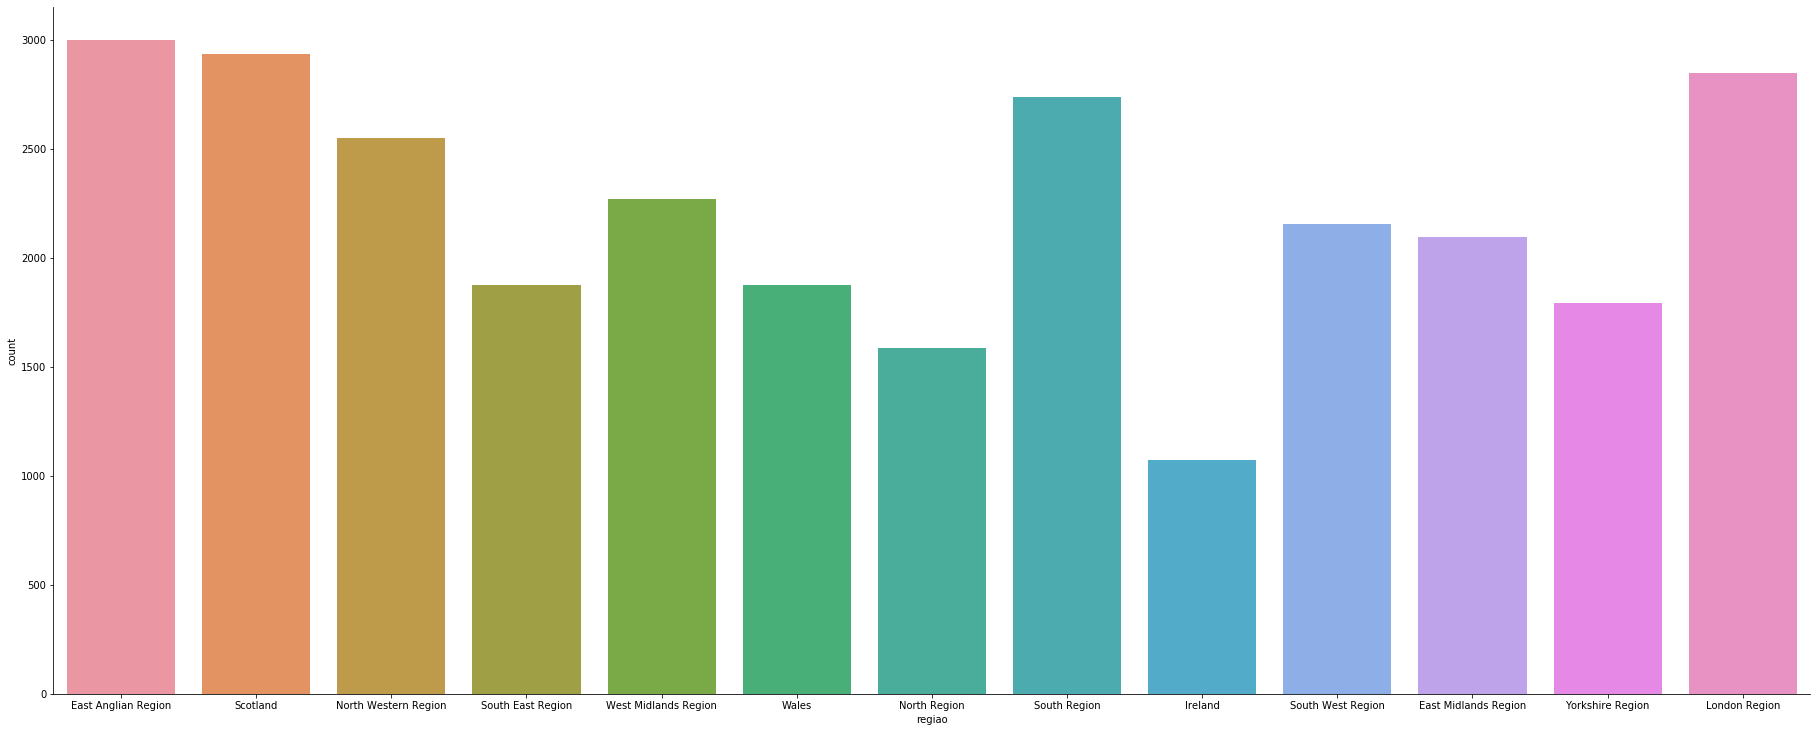

In [287]:
sns.catplot(x= 'regiao', kind='count', data=informacao_estudante_sem_duplicado, height=10.27, aspect=22.7/9.27)

In [288]:
qtd_aprov_regiao = pd.DataFrame(informacao_estudante[['id_estudante', 'regiao', 'resultado_final']].groupby(['regiao','resultado_final']).count()).reset_index().rename(columns={'id_estudante':'qtd_estudante'})
qtd_aprov_regiao = qtd_aprov_regiao.sort_values(by='qtd_estudante', ascending=False)
qtd_aprov_regiao.index = range(52)
qtd_aprov_regiao

,regiao,resultado_final,qtd_estudante
0,Scotland,Pass,1359
1,East Anglian Region,Pass,1309
2,South Region,Pass,1287
3,London Region,Withdrawn,1110
4,London Region,Pass,1099
5,North Western Region,Withdrawn,1034
6,East Anglian Region,Withdrawn,1006
7,North Western Region,Pass,955
8,South West Region,Pass,949
9,West Midlands Region,Pass,936


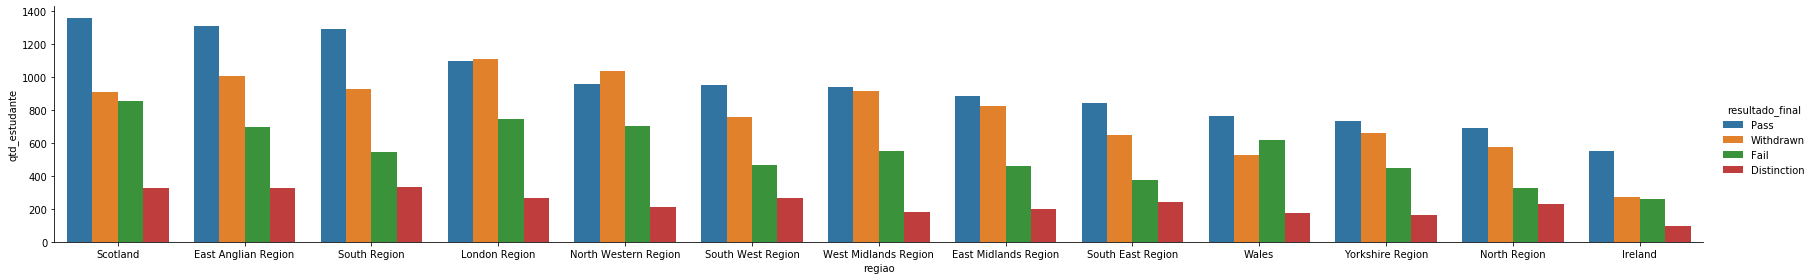

In [289]:
g1 = sns.catplot(x="regiao", y="qtd_estudante",

                hue="resultado_final", 

                data=qtd_aprov_regiao, kind="bar",

                height=4, aspect=6);

In [290]:
# Scotland , East Anglian Region, south region visualmente tem a maior quantidade de aprovados.

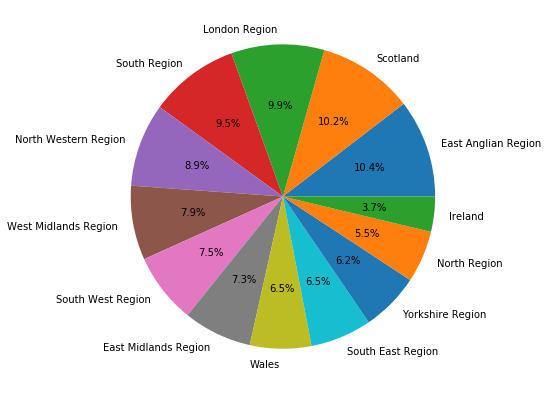

In [291]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(qtd_estudante_regiao['qtd_estudante'], labels = qtd_estudante_regiao['regiao'],autopct='%1.1f%%') 
plt.show()

In [292]:
regiao_depravacao = merge_estudante_ava[['cod_modulo','cod_apresentacao','id_estudante','regiao','ind_privacao_multipla','resultado_final','nivel_educacao','id_nivel_educacao','nu_credito',
                                     'id_site','qtd_click', 'data_interacao_aluno']]
regiao_depravacao.head(3)

,cod_modulo,cod_apresentacao,id_estudante,regiao,ind_privacao_multipla,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno
0,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546669.0,16.0,-5.0
1,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546662.0,44.0,-5.0
2,AAA,2013J,11391,East Anglian Region,90-100%,Pass,HE Qualification,3,240,546652.0,1.0,-5.0


In [293]:
regiao_depravacao['ind_privacao_multipla'].isnull().sum()

601942

In [294]:
#regiao_depravacao_groupby.to_csv('regiao_depravacao_groupby.csv', sep=';',index=False )

In [295]:
regiao_depravacao['ind_privacao_multipla'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [296]:
regiao_depravacao.sample(6)

,cod_modulo,cod_apresentacao,id_estudante,regiao,ind_privacao_multipla,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno
1914084,BBB,2014J,2634319,East Anglian Region,40-50%,Distinction,HE Qualification,3,60,937829.0,1.0,109.0
1627134,BBB,2014J,610545,South West Region,60-70%,Pass,A Level or Equivalent,2,60,913666.0,1.0,34.0
10271830,GGG,2013J,32239,London Region,30-40%,Pass,A Level or Equivalent,2,30,661575.0,5.0,36.0
10212920,FFF,2014J,2185729,Ireland,10-20,Pass,Lower Than A Level,1,60,882545.0,5.0,148.0
5065670,DDD,2014J,649383,Scotland,40-50%,Fail,HE Qualification,3,60,813701.0,2.0,63.0
7154331,FFF,2013B,2389267,South Region,20-30%,Pass,Lower Than A Level,1,120,527219.0,3.0,150.0


In [297]:
regiao_depravacao_group = informacao_estudante_sem_duplicado[['id_estudante', 'ind_privacao_multipla']].groupby(['ind_privacao_multipla']).count().reset_index().rename(columns={'id_estudante':'qtd_estudante'})
regiao_depravacao_group_1 = regiao_depravacao_group.sort_values(by='qtd_estudante', ascending=False)
regiao_depravacao_group_1.index=range(10)
regiao_depravacao_group_1


,ind_privacao_multipla,qtd_estudante
0,20-30%,3200
1,10-20,3132
2,30-40%,3128
3,0-10%,2944
4,40-50%,2890
5,50-60%,2787
6,60-70%,2560
7,70-80%,2532
8,80-90%,2421
9,90-100%,2220


In [298]:
regiao_depravacao_result = informacao_estudante[['id_estudante','resultado_final' ,'ind_privacao_multipla']].groupby(['ind_privacao_multipla','resultado_final']).count().reset_index().rename(columns={'id_estudante':'qtd_estudante'})
regiao_depravacao_result = regiao_depravacao_result.sort_values(by='qtd_estudante', ascending=False)
regiao_depravacao_result.index=range(len(regiao_depravacao_result))
regiao_depravacao_result



,ind_privacao_multipla,resultado_final,qtd_estudante
0,30-40%,Pass,1345
1,20-30%,Withdrawn,1321
2,10-20,Withdrawn,1246
3,0-10%,Withdrawn,1231
4,50-60%,Pass,1227
5,20-30%,Pass,1226
6,40-50%,Pass,1224
7,60-70%,Pass,1209
8,70-80%,Pass,1170
9,10-20,Pass,1167


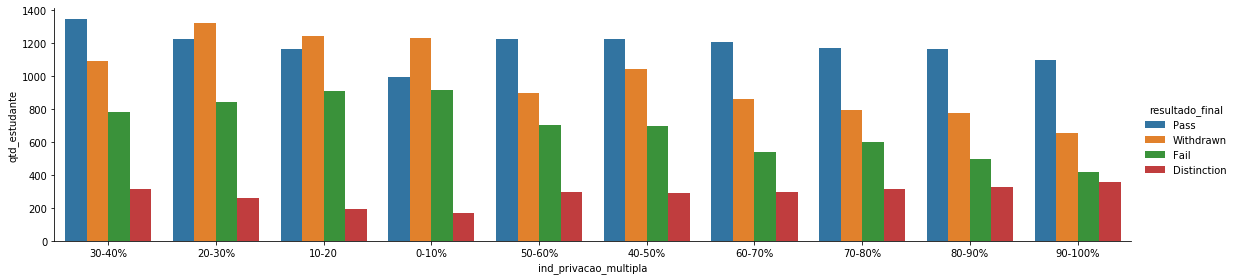

In [299]:
g1 = sns.catplot(x="ind_privacao_multipla", y="qtd_estudante",

                hue="resultado_final", 

                data=regiao_depravacao_result, kind="bar",

                height=4, aspect=4);

In [300]:
# percebe-se uma quantidade maior de cancelamentos quando o nível de ind_privacao_multipla é baixo (maior indice de pobreza).
#isso se mantem até a faixa do 20-30 %.  apos esse indice vai diminuindo e a taxa de aprovação aumentando.

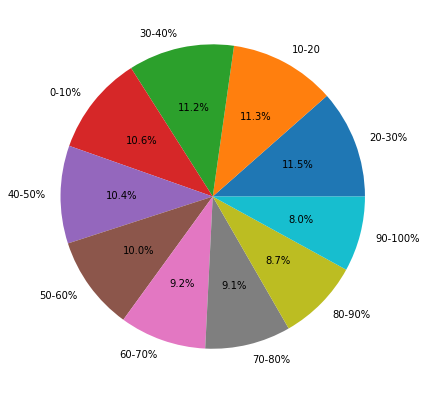

In [301]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(regiao_depravacao_group_1['qtd_estudante'], labels = regiao_depravacao_group_1['ind_privacao_multipla'],autopct='%1.1f%%') 
plt.show()

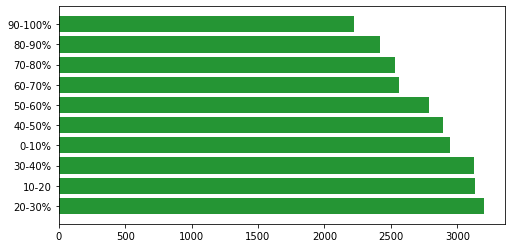

In [302]:
plt.figure(figsize=(8,4))
plt.barh(regiao_depravacao_group_1['ind_privacao_multipla'], regiao_depravacao_group_1['qtd_estudante'], color='#259534')
plt.show()

In [303]:
merge_estudante_ava_analise.head(5)

,cod_modulo,cod_apresentacao,id_estudante,faixa_etaria,regiao,resultado_final,nivel_educacao,id_nivel_educacao,nu_credito,id_site,qtd_click,data_interacao_aluno,regiao
0,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546669.0,16.0,-5.0,East Anglian Region
1,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546662.0,44.0,-5.0,East Anglian Region
2,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,East Anglian Region
3,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546668.0,2.0,-5.0,East Anglian Region
4,AAA,2013J,11391,55<=,East Anglian Region,Pass,HE Qualification,3,240,546652.0,1.0,-5.0,East Anglian Region


In [304]:
def corrigir_idade(idade):
    idade = idade.replace('<=','')
    return idade

In [305]:
informacao_estudante_sem_duplicado['faixa_etaria'] = informacao_estudante_sem_duplicado['faixa_etaria'].apply(corrigir_idade)
informacao_estudante_sem_duplicado

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cod_modulo,cod_apresentacao,id_estudante,sexo,regiao,nivel_educacao,ind_privacao_multipla,faixa_etaria,qtd_inscricao_modulo,nu_credito,deficiencia,resultado_final,id_sexo,id_nivel_educacao,id_deficiencia
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55,0,240,N,Pass,0,3.0,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,3.0,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,2.0,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1,2.0,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,1,1.0,0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,1,1.0,0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1,2.0,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,1,1.0,0


In [306]:
informacao_estudante_sem_duplicado[['id_estudante','faixa_etaria']].groupby(['faixa_etaria']).count()

,id_estudante
faixa_etaria,
0-35,20145
35-55,8462
55,178


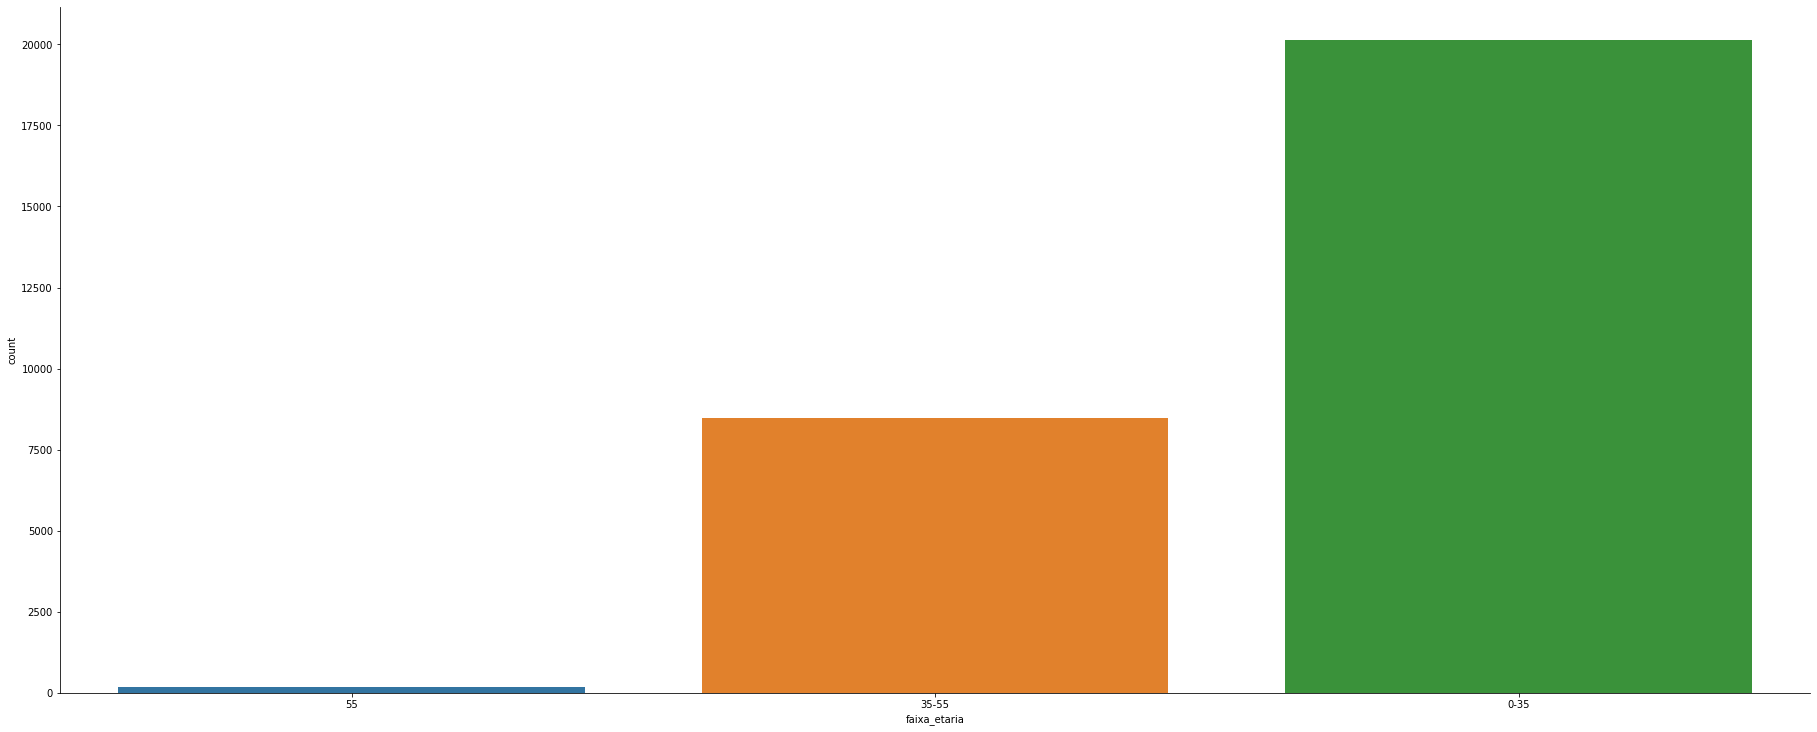

In [307]:
sns.catplot(x= 'faixa_etaria', kind='count', data=informacao_estudante_sem_duplicado, height=10.27, aspect=22.7/9.27)

In [308]:
studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [309]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [310]:
print('Datatype studentAssessment ')
studentAssessment.dtypes

Datatype studentAssessment 


id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [311]:
studentAssessment['score'] = studentAssessment['score'].fillna(0)

In [312]:
studentAssessment_traducao = {'id_assessment':'id_avaliacao',
'id_student':'id_estudante',
'date_submitted':'data_envio',
'is_banked': 'repostado_de_outra_avaliacao',
'score':'pontos'
    
}

In [313]:
studentAssessment = studentAssessment.rename(columns=studentAssessment_traducao)
studentAssessment.head(5)

,id_avaliacao,id_estudante,data_envio,repostado_de_outra_avaliacao,pontos
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [314]:
#quantos alunos repostaram um avaliação

studentAssessment[['repostado_de_outra_avaliacao', 'id_estudante']].groupby(['repostado_de_outra_avaliacao']).count()

,id_estudante
repostado_de_outra_avaliacao,
0,172003
1,1909


In [315]:
assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [316]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [317]:
print('Datatype assessments ')
assessments.dtypes


Datatype assessments 


code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [318]:
assessments['weight'] = assessments['weight'].fillna(0)

In [319]:
assessments_traducao = {'code_module':'cod_modulo',
'code_presentation':'cod_apresentacao',
'id_assessment':'id_avaliacao',
'assessment_type':'tipo_avaliacao',
'date':'data_final_envio',
'weight':'peso'
}

In [320]:
assessments = assessments.rename(columns=assessments_traducao)
assessments_agrupamento = pd.DataFrame(assessments.groupby(['cod_modulo', 'cod_apresentacao', 'tipo_avaliacao']).agg({'peso': np.mean}).round(2)).reset_index()
assessments_agrupamento

,cod_modulo,cod_apresentacao,tipo_avaliacao,peso
0,AAA,2013J,Exam,100.00
1,AAA,2013J,TMA,20.00
2,AAA,2014J,Exam,100.00
3,AAA,2014J,TMA,20.00
4,BBB,2013B,CMA,1.00
5,BBB,2013B,Exam,100.00
6,BBB,2013B,TMA,15.83
7,BBB,2013J,CMA,1.00
8,BBB,2013J,Exam,100.00
9,BBB,2013J,TMA,15.83


In [321]:
assessments.sample(3)

,cod_modulo,cod_apresentacao,id_avaliacao,tipo_avaliacao,data_final_envio,peso
13,BBB,2013B,14992,CMA,89.0,1.0
194,GGG,2014B,37427,TMA,166.0,0.0
136,FFF,2013B,34872,Exam,222.0,100.0


In [322]:
assessments.tipo_avaliacao.unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [323]:
assessments.groupby(['tipo_avaliacao']).get_group('Exam')

,cod_modulo,cod_apresentacao,id_avaliacao,tipo_avaliacao,data_final_envio,peso
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [324]:
estudante_avaliacao_merge = pd.merge(studentAssessment, assessments, how='left', on='id_avaliacao')


In [325]:
estudante_avaliacao_merge_grop = estudante_avaliacao_merge.groupby([ 'id_estudante',
       'repostado_de_outra_avaliacao', 'pontos', 'cod_modulo',
       'cod_apresentacao', 'tipo_avaliacao','peso']).agg({'pontos':np.sum})
estudante_avaliacao_merge_grop

pontos
id_estudante repostado_de_outra_avaliacao pontos cod_modulo cod_apresentacao tipo_avaliacao peso        
6516         0                            48.0   AAA        2014J            TMA            20.0    48.0
                                          60.0   AAA        2014J            TMA            10.0    60.0
                                          61.0   AAA        2014J            TMA            20.0    61.0
                                          63.0   AAA        2014J            TMA            20.0    63.0
                                          77.0   AAA        2014J            TMA            30.0    77.0
...                                                                                                  ...
2698577      0                            100.0  BBB        2014J            TMA            0.0    100.0
2698588      0                            85.0   BBB        2014J            TMA            10.0    85.0
                                          87.0   BBB        2014J            TMA            20.0    87.0
                                          95.0   BBB        2014J            TMA            35.0   190.0
                                          100.0  BBB        2014J            TMA            0.0    100.0

[153282 rows x 1 columns]

In [326]:
estudante_avaliacao_merge.columns

Index(['id_avaliacao', 'id_estudante', 'data_envio',
       'repostado_de_outra_avaliacao', 'pontos', 'cod_modulo',
       'cod_apresentacao', 'tipo_avaliacao', 'data_final_envio', 'peso'],
      dtype='object')

In [327]:
estudante_avaliacao_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 10 columns):
id_avaliacao                    173912 non-null int64
id_estudante                    173912 non-null int64
data_envio                      173912 non-null int64
repostado_de_outra_avaliacao    173912 non-null int64
pontos                          173912 non-null float64
cod_modulo                      173912 non-null object
cod_apresentacao                173912 non-null object
tipo_avaliacao                  173912 non-null object
data_final_envio                171047 non-null float64
peso                            173912 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 14.6+ MB


In [328]:
# qual avaliacao que teve maior numero de pontos 
estudante_avaliacao_merge_sort = estudante_avaliacao_merge[['tipo_avaliacao', 'peso']].groupby(['tipo_avaliacao']).sum().reset_index()
estudante_avaliacao_merge_sort = estudante_avaliacao_merge_sort.sort_values(by='peso', ascending=False)
estudante_avaliacao_merge_sort.index=range(3)
estudante_avaliacao_merge_sort

,tipo_avaliacao,peso
0,TMA,1630766.0
1,Exam,495900.0
2,CMA,89651.0


In [329]:
# média dos pontos de cada tipo de avaliacao
media_pontos_avaliacao =  estudante_avaliacao_merge[['pontos', 'tipo_avaliacao']].groupby(['tipo_avaliacao']).mean().reset_index().rename(columns={'pontos':'media_pontos'})
media_pontos_avaliacao = media_pontos_avaliacao.sort_values(by='media_pontos', ascending=False)
media_pontos_avaliacao.index=range(3)
media_pontos_avaliacao

,tipo_avaliacao,media_pontos
0,CMA,81.027053
1,TMA,72.435850
2,Exam,65.572898


In [330]:
media_pontos_avaliacao_peso =  estudante_avaliacao_merge[['peso', 'tipo_avaliacao']].groupby(['tipo_avaliacao']).mean().reset_index()
media_pontos_avaliacao_peso = media_pontos_avaliacao_peso.sort_values(by='peso', ascending=False)
media_pontos_avaliacao_peso.index=range(3)
media_pontos_avaliacao_peso

,tipo_avaliacao,peso
0,Exam,100.000000
1,TMA,16.568447
2,CMA,1.271159


 Exam possui maior média de pesos, logo possui uma maior importancia 

In [331]:
estudante_avaliacao_merge

,id_avaliacao,id_estudante,data_envio,repostado_de_outra_avaliacao,pontos,cod_modulo,cod_apresentacao,tipo_avaliacao,data_final_envio,peso
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [332]:
# modulo com maior média de pontos

media_pontos_modulo =  estudante_avaliacao_merge[['pontos', 'cod_modulo']].groupby(['cod_modulo']).mean().reset_index()
media_pontos_modulo = media_pontos_modulo.sort_values(by='pontos', ascending=False)
media_pontos_modulo.index=range(7)
media_pontos_modulo['pontos'] =media_pontos_modulo['pontos'].astype(int)
media_pontos_modulo

,cod_modulo,pontos
0,EEE,81
1,GGG,79
2,FFF,77
3,BBB,76
4,CCC,73
5,DDD,69
6,AAA,68


In [333]:
#df_merge_avaliacao = pd.merge(buscar_pass_fail,estudante_avaliacao_merge, how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'])
#df_merge_avaliacao

In [334]:
#import gc
#gc.collect()
#df_merge_avaliacao_group = pd.merge(informacao_estudante,estudante_avaliacao_merge, how='left', on=['cod_modulo', 'cod_apresentacao', 'id_estudante'])

In [335]:
media_aprovado_reprovado.head(5)

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
2,23629,Fail,161.0
3,23698,Pass,910.0
4,24186,Pass,184.0


# Identificando e removendo Outliers

In [336]:
selecao = media_aprovado_reprovado['resultado_final'] == 'Pass'
df_aprovado_click = media_aprovado_reprovado[selecao]
df_aprovado_click

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
3,23698,Pass,910.0
4,24186,Pass,184.0
5,24213,Pass,1992.0
...,...,...,...
18681,2697885,Pass,1986.0
18683,2697921,Pass,1767.0
18684,2698125,Pass,1243.0
18686,2698257,Pass,758.0


In [337]:
selecao = media_aprovado_reprovado['resultado_final'] == 'Fail'
df_reprovado_click = media_aprovado_reprovado[selecao]
df_reprovado_click

,id_estudante,resultado_final,qtd_click
2,23629,Fail,161.0
11,26247,Fail,478.0
13,26734,Fail,210.0
14,26915,Fail,61.0
15,27189,Fail,2638.0
...,...,...,...
18682,2697921,Fail,2319.0
18685,2698251,Fail,1511.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


In [338]:
df_aprovado_click_somente = df_aprovado_click['qtd_click']
df_aprovado_click_somente

0        2791.0
1         934.0
3         910.0
4         184.0
5        1992.0
          ...  
18681    1986.0
18683    1767.0
18684    1243.0
18686     758.0
18687    3455.0
Name: qtd_click, Length: 11881, dtype: float64

In [339]:
df_reprovado_click_somente = df_reprovado_click['qtd_click']
df_reprovado_click_somente

2         161.0
11        478.0
13        210.0
14         61.0
15       2638.0
          ...  
18682    2319.0
18685    1511.0
18688     717.0
18689       0.0
18690       0.0
Name: qtd_click, Length: 6810, dtype: float64

In [340]:
#Removendo outlies dos clicks dos aprovados

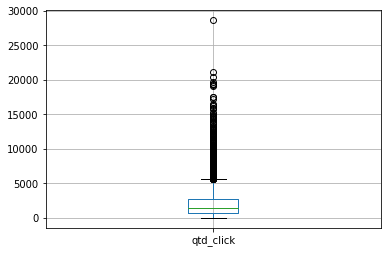

In [341]:
df_aprovado_click.boxplot(['qtd_click'])

In [342]:
Q1_aprovado = df_aprovado_click_somente.quantile(.25)
Q1_aprovado

691.0

In [343]:
Q3_aprovado = df_aprovado_click_somente.quantile(.75)
Q3_aprovado

2689.0

In [344]:
IIQ = Q3_aprovado - Q1_aprovado
limite_inferior = Q1_aprovado - 1.5 * IIQ
limite_superior = Q1_aprovado + 1.5 * IIQ


In [345]:
limite_inferior

-2306.0

In [346]:
limite_superior

3688.0

In [347]:
selecao_aprovado = (df_aprovado_click_somente >=limite_inferior) & (df_aprovado_click_somente <= limite_superior)
selecao_aprovado

0        True
1        True
3        True
4        True
5        True
         ... 
18681    True
18683    True
18684    True
18686    True
18687    True
Name: qtd_click, Length: 11881, dtype: bool

In [348]:
aprovado_new = df_aprovado_click[selecao_aprovado]
aprovado_new

,id_estudante,resultado_final,qtd_click
0,6516,Pass,2791.0
1,11391,Pass,934.0
3,23698,Pass,910.0
4,24186,Pass,184.0
5,24213,Pass,1992.0
...,...,...,...
18681,2697885,Pass,1986.0
18683,2697921,Pass,1767.0
18684,2698125,Pass,1243.0
18686,2698257,Pass,758.0


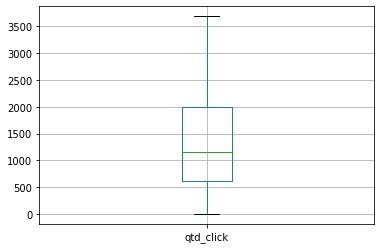

In [349]:
aprovado_new.boxplot(['qtd_click'])

In [350]:
Q1_reprovado = df_reprovado_click_somente.quantile(.25)
Q1_reprovado

102.0

In [351]:
Q3_reprovado = df_reprovado_click_somente.quantile(.75)
Q3_reprovado

829.75

In [352]:
IIQ = Q3_reprovado - Q1_reprovado
limite_inferior = Q1_reprovado - 1.5 * IIQ
limite_superior = Q1_reprovado + 1.5 * IIQ

In [353]:
selecao_reprovado = (df_reprovado_click_somente >=limite_inferior) & (df_reprovado_click_somente <= limite_superior)
selecao_reprovado

2         True
11        True
13        True
14        True
15       False
         ...  
18682    False
18685    False
18688     True
18689     True
18690     True
Name: qtd_click, Length: 6810, dtype: bool

In [354]:
dados_reprovado_new = df_reprovado_click[selecao_reprovado]
dados_reprovado_new

,id_estudante,resultado_final,qtd_click
2,23629,Fail,161.0
11,26247,Fail,478.0
13,26734,Fail,210.0
14,26915,Fail,61.0
17,27759,Fail,366.0
...,...,...,...
18677,2696376,Fail,282.0
18680,2697773,Fail,148.0
18688,2698577,Fail,717.0
18689,2707979,Fail,0.0


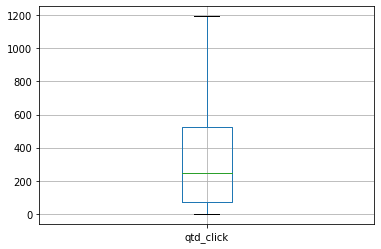

In [355]:
dados_reprovado_new.boxplot(['qtd_click'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209F99FD888>]],
      dtype=object)

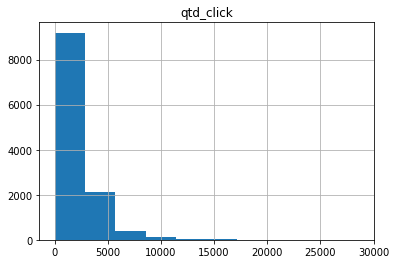

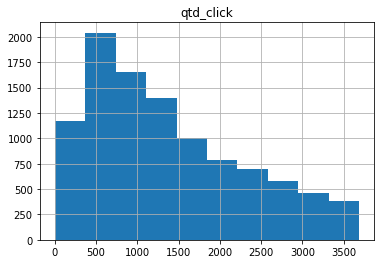

In [356]:
df_aprovado_click.hist(['qtd_click'])
aprovado_new.hist('qtd_click')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209F9A52688>]],
      dtype=object)

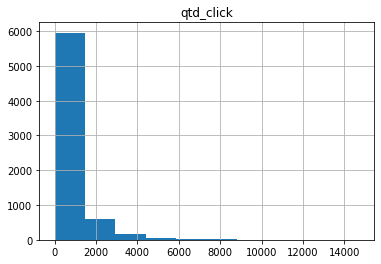

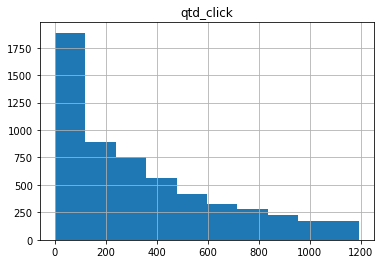

In [357]:
df_reprovado_click.hist(['qtd_click'])
dados_reprovado_new.hist('qtd_click')

# Teste de hipótese

In [358]:
r1 = ranksums(df_aprovado_click['qtd_click'],df_reprovado_click['qtd_click'])
r1

RanksumsResult(statistic=69.8081182754003, pvalue=0.0)

In [359]:
r2 = ranksums(aprovado_new['qtd_click'],dados_reprovado_new['qtd_click'])
r2

RanksumsResult(statistic=79.39468488549255, pvalue=0.0)

In [360]:
print('o valor do p-value é {}'.format(r1.pvalue))

o valor do p-value é 0.0


Valores-P baixos (<0.05): seus dados não são prováveis com uma hipótese nula verdadeira.
Hípotese alternativa - a distribuição dos clicks é igual ou parecida para os alunos que passaram e reprovaram